In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime



In [ ]:
dataset=pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


<Axes: >

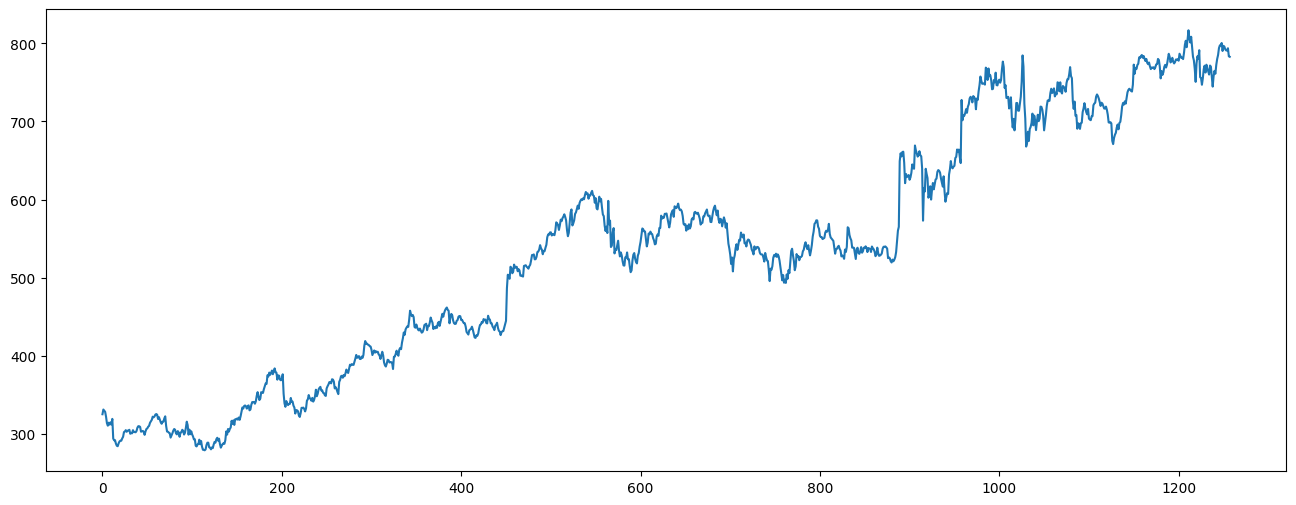

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
dataset['Close']=dataset["Close"].str.replace(',','').astype(float)

In [ ]:
dataset['Volume']=dataset["Volume"].str.replace(',','').astype(float)

In [ ]:
dataset.rolling(7).mean().head(20)

<ipython-input-9-8b2121cc686f>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  dataset.rolling(7).mean().head(20)


,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,323.002857,325.392857,318.682857,643.132857,7.208100e+06
7,321.457143,322.882857,316.841429,638.037143,6.691514e+06
8,318.698571,319.801429,314.025714,631.870000,6.531857e+06
9,316.552857,317.524286,311.851429,627.534286,6.137929e+06


<ipython-input-10-bc6b54bb3957>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  dataset.rolling(window=30).mean()['Close'].plot()


<Axes: >

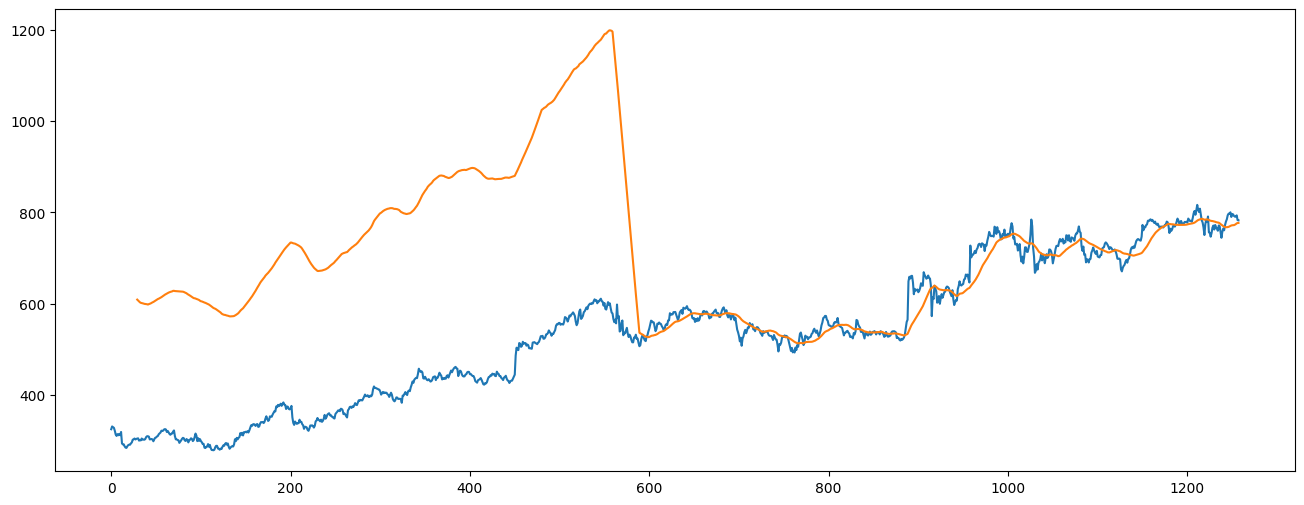

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<Axes: >

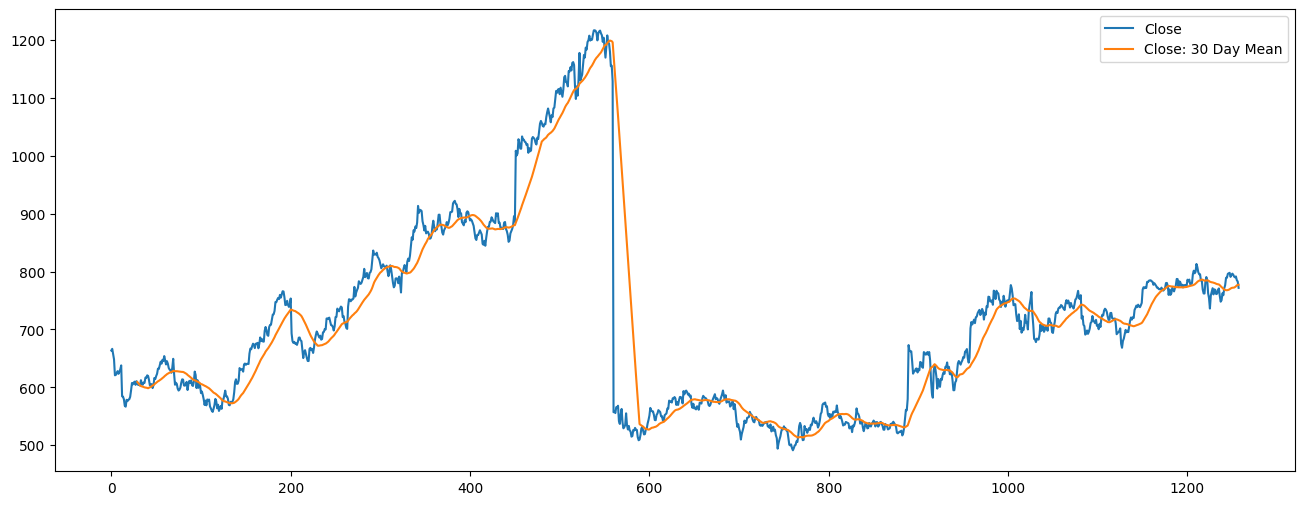

In [ ]:
dataset['Close: 30 Day Mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))


<Axes: >

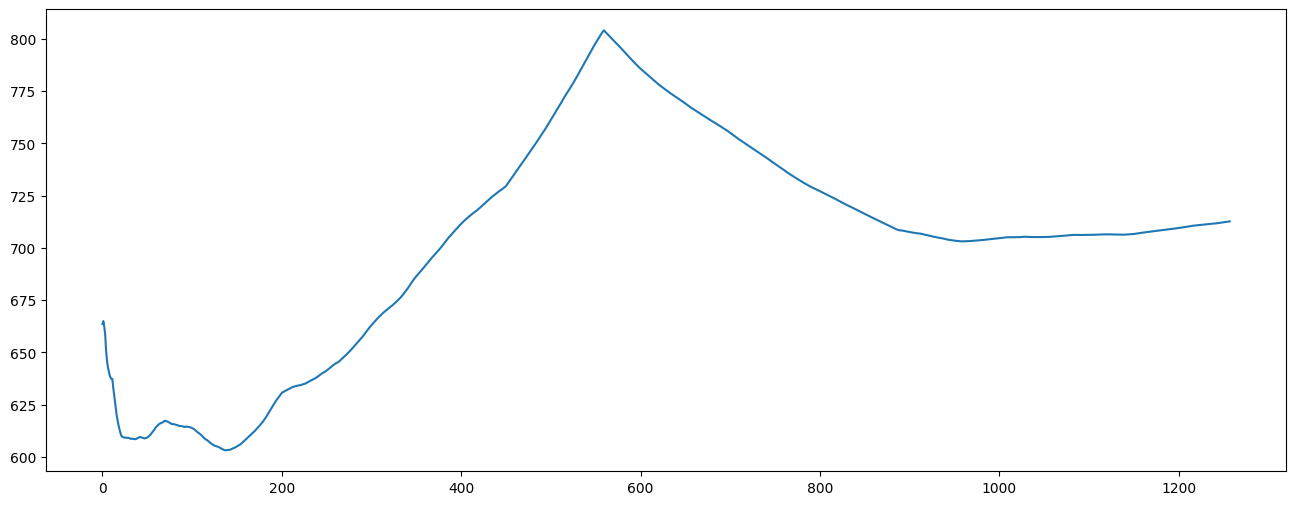

In [ ]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16, 6))

In [ ]:
traning_set=dataset['Open']
traning_set=pd.DataFrame(traning_set)
traning_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [ ]:
dataset.isna().any()

Date                  False
Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(traning_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = []
Y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  Y_train.append(training_set_scaled[i,0])
X_train, Y_train = np.array(X_train) , np.array(Y_train)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 17s 194ms/step - loss: 0.0477
Epoch 2/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0040
Epoch 7/100
38/38 [==============================] - 13s 350ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 11s 299ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 12s 306ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 9s 214ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 10s 251ms/step - loss: 0.0043
Epoch 13

In [ ]:
y_pred = regressor.predict(X_train)

38/38 [==============================] - 3s 37ms/step


In [ ]:
y_pred

array([[0.08751066],
       [0.08978567],
       [0.09137215],
       ...,
       [0.9373021 ],
       [0.9386616 ],
       [0.93659496]], dtype=float32)

In [ ]:
Y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [ ]:
dataset_test=pd.read_csv('/content/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [51]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [52]:
 #dataset_test.head()
 real_stock_price

array([[789.63],
       [791.34],
       [794.48],
       [807.9 ],
       [809.97],
       [809.13],
       [808.15],
       [807.39],
       [811.22],
       [807.14],
       [806.21],
       [809.48],
       [806.91],
       [820.87],
       [825.9 ],
       [835.77],
       [838.  ],
       [841.95],
       [815.84],
       [801.25]])

In [53]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     float64
dtypes: float64(5)
memory usage: 960.0 bytes


In [54]:
dataset_test['Volume']=dataset_test["Volume"].str.replace(',','').astype(float)

AttributeError: ignored

In [57]:
test_set=dataset['Open']
test_set=pd.DataFrame(test_set)

In [56]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB


In [58]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)

# Correct the transform function to transform (standardize) the inputs
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [59]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


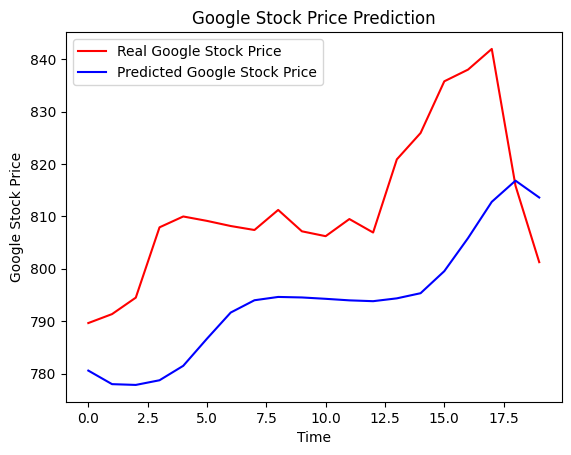

In [60]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [61]:
real_stock_price

array([[789.63],
       [791.34],
       [794.48],
       [807.9 ],
       [809.97],
       [809.13],
       [808.15],
       [807.39],
       [811.22],
       [807.14],
       [806.21],
       [809.48],
       [806.91],
       [820.87],
       [825.9 ],
       [835.77],
       [838.  ],
       [841.95],
       [815.84],
       [801.25]])

In [62]:
predicted_stock_price

,0
0,780.556885
1,777.969299
2,777.821899
3,778.711487
4,781.470459
5,786.648621
6,791.635925
7,793.981323
8,794.613953
9,794.515747
